# UFC Dataset EDA & Prediction
## Intro to DataScience, HiT 2020
### Yair Cohen S. 302599816

![UFC_Belt](https://media.gettyimages.com/photos/an-overhead-view-of-the-octagon-as-jon-jones-punches-daniel-cormier-picture-id824389748?s=2048x2048)

# Table Of Content

## Section 1 -   EDA:
1. **Dataset Validation**
    1. Loading the Dataset
    2. Checking for null values and drop
    3. Reassuring float d.type to of numeric columns <br><br>

2. **Data Analysis by Visualization**:<br><br>
A. **Analysis by Weight Class categories in the UFC**:
 >1. Average match duration
   2. Match ending types
   1. Knockouts
   2. Submission
         
B.**Other key parameters displayed across Weight classes**
 >1. Athlete's Height
2. Athlete's Reach
3. UFC's Atheletes Age Distribution

C. **Stance types**:
 >1. Stance types proporion in UFC
2. Stance type proportion in Contendors share
 
D. **Championship**
 1. Titile bouts share out of all matches
 2. What champion got the most Title bouts wins?
 3. Champion analysis - **Anderson Silva**
 >1. Anderson Silva's preformence at casual matches vs Title Bouts
    2. Anderson Silva's *win types at casual matches vs Title Bouts
    
## Section 2 - Winner Prediction

1. Visualization: Winner by Corner color
2. Exploring the unprocessed Dataset used for prediction and handling null values
3. Splitting the DS into Features and Categories
4. Splitting the DS into Train and Test
5. **Prediction by**
    >  1. KNN Neighbours Classifier
    2. Desicion Tree Classifier
    3. Random Forset Classifier
    4. Logistic Regression Model
    5. Support Vector Machine Model
6. Results

## Section 3 - Summary
1. **Summary**

## Importing packages

In [1]:
#Handling the Dataset
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Math fuctions
import math
import pylab
from numpy import mean

#Machine leraning functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Machine learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Loading the datasets

In [2]:
#Reading the UFC Dataset (Used for Section #1- Visualization)
UFC_df = pd.read_csv('./data.csv')

#Transpose the DF
UFC_df.head().T

,0,1,2,3,4
R_fighter,Henry Cejudo,Valentina Shevchenko,Tony Ferguson,Jimmie Rivera,Tai Tuivasa
B_fighter,Marlon Moraes,Jessica Eye,Donald Cerrone,Petr Yan,Blagoy Ivanov
Referee,Marc Goddard,Robert Madrigal,Dan Miragliotta,Kevin MacDonald,Dan Miragliotta
date,2019-06-08,2019-06-08,2019-06-08,2019-06-08,2019-06-08
location,"Chicago, Illinois, USA","Chicago, Illinois, USA","Chicago, Illinois, USA","Chicago, Illinois, USA","Chicago, Illinois, USA"
Winner,Red,Red,Red,Blue,Blue
title_bout,True,True,False,False,False
weight_class,Bantamweight,Women's Flyweight,Lightweight,Bantamweight,Heavyweight
no_of_rounds,5,5,3,3,3
B_current_lose_streak,0,0,0,0,0


# Section 1:   Exploratory Data Analysis

In [3]:
#DataFrame Details: Num of Rows, Cols and Data types
UFC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [4]:
#Checking the sum of all null values
UFC_df.isnull().sum().sort_values(ascending=False)

B_avg_opp_DISTANCE_att          1265
B_avg_TD_pct                    1265
B_avg_opp_TD_att                1265
B_avg_opp_TD_landed             1265
B_avg_opp_TOTAL_STR_att         1265
B_avg_opp_TOTAL_STR_landed      1265
B_avg_opp_CLINCH_att            1265
B_total_time_fought(seconds)    1265
B_avg_opp_BODY_landed           1265
B_avg_opp_BODY_att              1265
B_avg_TOTAL_STR_landed          1265
B_avg_TOTAL_STR_att             1265
B_avg_TD_landed                 1265
B_avg_opp_SIG_STR_pct           1265
B_avg_LEG_att                   1265
B_avg_LEG_landed                1265
B_avg_TD_att                    1265
B_avg_SUB_ATT                   1265
B_avg_SIG_STR_pct               1265
B_avg_SIG_STR_landed            1265
B_avg_SIG_STR_att               1265
B_avg_REV                       1265
B_avg_PASS                      1265
B_avg_opp_CLINCH_landed         1265
B_avg_opp_SUB_ATT               1265
B_avg_opp_TD_pct                1265
B_avg_opp_SIG_STR_landed        1265
B

In [5]:
#Drop all null values
UFC_df.dropna(inplace=True)

#Check for null values again
UFC_df.isnull().sum()

R_fighter                       0
B_fighter                       0
Referee                         0
date                            0
location                        0
Winner                          0
title_bout                      0
weight_class                    0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_avg_BODY_att                  0
B_avg_BODY_landed               0
B_avg_CLINCH_att                0
B_avg_CLINCH_landed             0
B_avg_DISTANCE_att              0
B_avg_DISTANCE_landed           0
B_avg_GROUND_att                0
B_avg_GROUND_landed             0
B_avg_HEAD_att                  0
B_avg_HEAD_landed               0
B_avg_KD                        0
B_avg_LEG_att                   0
B_avg_LEG_landed                0
B_avg_PASS                      0
B_avg_REV                       0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_SIG_STR_

In [6]:
#List of all data types
UFC_df.dtypes

R_fighter                        object
B_fighter                        object
Referee                          object
date                             object
location                         object
Winner                           object
title_bout                         bool
weight_class                     object
no_of_rounds                      int64
B_current_lose_streak           float64
B_current_win_streak            float64
B_draw                          float64
B_avg_BODY_att                  float64
B_avg_BODY_landed               float64
B_avg_CLINCH_att                float64
B_avg_CLINCH_landed             float64
B_avg_DISTANCE_att              float64
B_avg_DISTANCE_landed           float64
B_avg_GROUND_att                float64
B_avg_GROUND_landed             float64
B_avg_HEAD_att                  float64
B_avg_HEAD_landed               float64
B_avg_KD                        float64
B_avg_LEG_att                   float64
B_avg_LEG_landed                float64


In [7]:
# Converting for reassurence all numeric cols to float
cols = UFC_df.columns
toInclude = ['_avg_', 'pct', '_age', 'total', 'time', 'no_of_']

for colname in cols:
    for term in toInclude:
        if term in colname:
            UFC_df[colname] = pd.to_numeric(UFC_df[colname])
  
#UFC_df.info()

# Weight Classes in UFC 
Probably at any combat sport, the athletes are splitted to Weight Classes aming to keep the competition fair.
<br>**Since the athlete's mass is a great factor in any sport, espcially in combat sports,  The division into different weight classes minimalizing it's influence and maximalizing other great factors as combat Techniques and Styles**, which are among the reasons the UFC has gained it's popularity, because it displays most of the effective varaitey there is out there.


## First let's take a look at the UFC's weight class scale

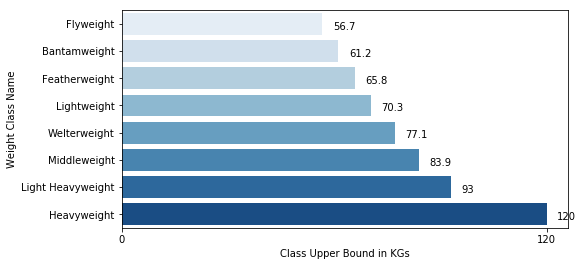

In [8]:
# Creating a list of the Weight Classes
classes = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight']

# List of all Classes's upper bound in KG's
weights = [56.7, 61.2, 65.8, 70.3, 77.1, 83.9, 93, 120]

# Defining plot figure size
fig, ax = plt.subplots(figsize=(8,4))

# Creating bar plot
classesBar = sns.barplot(x=weights, y=classes, palette='Blues')

# Naming X&Y labels
plt.xlabel('Class Upper Bound in KGs')
plt.ylabel('Weight Class Name')

# Changing x axis ticks to Min & Max
plt.xticks([0, 120])

#Positioning values on graph
for i, v in enumerate(weights):
    ax.text(v + 3, i + .20, str(v), color='black', fontweight='normal', fontsize=10)

# Showing the graph
classesBar

**Note** that there's no lower bound to Flyweight class

## But what is the propotion of the different Weight Classes?
**Let's count them:**

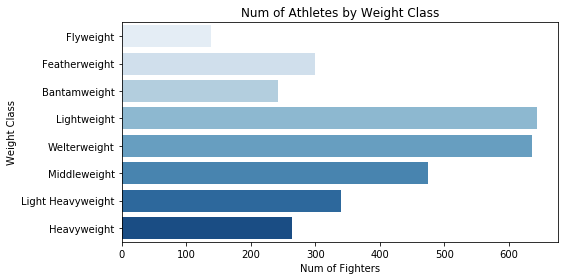

In [9]:
fig, ax = plt.subplots(figsize=(8,4))

# Creating Count plot, defining specific order
weightClasses = sns.countplot(y="weight_class", data=UFC_df, order=['Flyweight','Featherweight','Bantamweight','Lightweight','Welterweight','Middleweight','Light Heavyweight','Heavyweight'], palette="Blues")

plt.title("Num of Athletes by Weight Class")
plt.xlabel("Num of Fighters")
plt.ylabel("Weight Class")
plt.tight_layout()

weightClasses

### We can see that the middle way classes has the largest representation in UFC
> Suprising enough or not, The Lightest classes is smaller than the Heaviest.

## Average Match Duration

####  Hint: Not all fights ends within the same duration.
> <br> **1. Technically a match has no limit on how soon it will be ended, but does on how long.**
<br>2. Each round is 5 minutes.
<br>3. A casual match ends within 3 rounds / A Title Match or a 'Fight of the Night', both ends within 5 rounds.

### So Lets cut the average match duration through Weight Class:

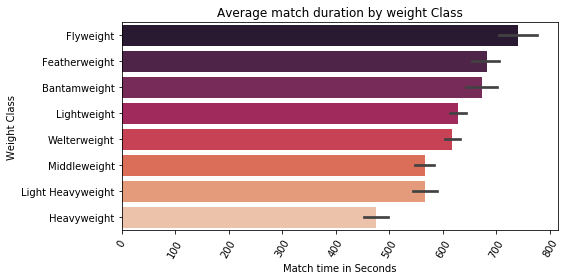

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
duration = sns.barplot(x='R_total_time_fought(seconds)',y="weight_class", data=UFC_df,estimator=mean,order=['Flyweight','Featherweight','Bantamweight','Lightweight','Welterweight','Middleweight','Light Heavyweight','Heavyweight'], palette="rocket")

plt.ylabel('Weight Class')
plt.xlabel('Match time in Seconds')

plt.title('Average match duration by weight Class')

plt.xticks(rotation=60)
plt.tight_layout()

duration

### We can observe the correlation of match duration to the weight class:
> The heavier the wieght class is, the average match duration is coming down.
<br>**Flyweight which is the lighest category tends to fight the longest, and Heavyweight (Heaviest) tends to fight the shortest fights.**
<br>The common logic is, the lighter the athlete is, the easier is to develop and maintain high cardio capabillities - which means more attacks. <br>
Following that logic, that means the lighter the athlete is, the less lethal his shots are? <br>
**Let's inquire into that question:**



## In what ways a UFC match can end?
## **A UFC match can end by 5 ways:**
> <br>**1. By Knockout (KO):** <br> 
 This is not only often the most exciting moment of a match, but also delivered the most <br> spectacular fights of underdog come-backs, which by judges score the favourite opponent would win.
<br>**2. By Techniqal Knockout (TKO):** 
<br>If the referee feels like the beaten opponent can not defened him self and recover from the attack he's under, and hes not tapping out, the ref will end the fight by Techniqal Knockout. (At this Dataset KO and TKO are counted together)
<br>**3. By Submission:** <br>
usually appears under a ground game, like arm\leg bar or chocking. Submission occures once an opponent has tapped out.
<br>**4. By Judge's Score:** 
<br>3 Judges are counting and scoring each athlete's striking and defencing displayed techniques, if all rounds has ended with both standing up, the desicion is up to the Judges scores. Either by split desicion (majority) or unanimous.
<br>**5. By a Doctor Stoppage:**
<br>if he thinks the athelte has taken too much damage that he might not recover properly from.


## So lets cut the knockouts by Weight Class
### But first let's take a look at average of attemptted and landed shots at all Weight Classes:

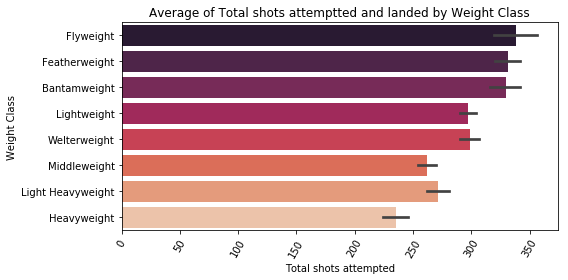

In [11]:
# Concating all Red and Blue Corner's total Strikes - Attempts + Success
totalStrikes_Red_Blue = UFC_df['R_avg_TOTAL_STR_att'] + UFC_df['R_avg_TOTAL_STR_landed'] + UFC_df['B_avg_TOTAL_STR_att'] + UFC_df['B_avg_TOTAL_STR_landed']

#Ploting
fig, ax = plt.subplots(figsize=(8,4))
shots = sns.barplot(x=totalStrikes_Red_Blue,y='weight_class', data=UFC_df, estimator=mean,order=['Flyweight','Featherweight','Bantamweight','Lightweight','Welterweight','Middleweight','Light Heavyweight','Heavyweight'], palette="rocket")

plt.title('Average of Total shots attemptted and landed by Weight Class')
plt.xlabel('Total shots attempted')
plt.ylabel('Weight Class')

plt.xticks(rotation=60)
plt.tight_layout()

shots

### As we can see, again, the Lighter the class is, more shots has been thrown
## But which class is actually most likely to win by Knockout?

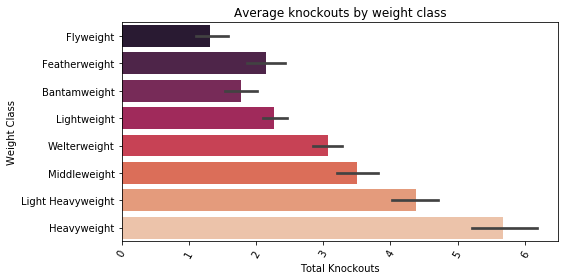

In [12]:
# Concating Red and Blue Corner's wins by Knockouts
knockoutWins_Red_Blue = UFC_df['R_win_by_KO/TKO'] + UFC_df['B_win_by_KO/TKO']

#Ploting
fig, ax = plt.subplots(figsize=(8,4))
knockouts = sns.barplot(x=knockoutWins_Red_Blue,y="weight_class", data=UFC_df,estimator=mean, order=['Flyweight','Featherweight','Bantamweight','Lightweight','Welterweight','Middleweight','Light Heavyweight','Heavyweight'], palette="rocket")

plt.title('Average knockouts by weight class')
plt.ylabel('Weight Class')
plt.xlabel('Total Knockouts')

plt.xticks(rotation=60)
plt.tight_layout()

knockouts

### Conclusion: The heaviest the category is, the more chance of a knockout ending
> Which assure the assumed logic - **the heavyier the athelte is, the lethal his shots are.**
<br>Although heavier weight classes in general throws less shots in average, when they hit the spot, the chances for a Knockout is at it's peak.

## Now let's take a look at winning by submission
> Submission takes place more often as the athletes wrestling on the ground, where the optmial use of body mass is a critical factor.

### First, all submissions attempts:

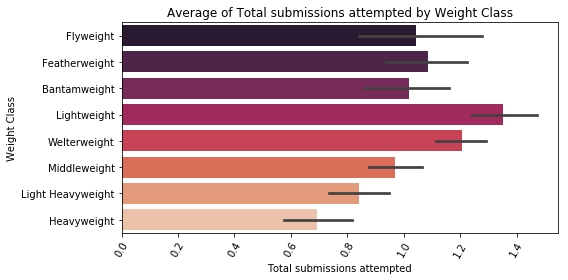

In [13]:
# Concating Red and Blue Croners submission attempts
submissionAttempts_Red_Blue = UFC_df['R_avg_SUB_ATT'] + UFC_df['R_avg_SUB_ATT']

# Ploting
fig, ax = plt.subplots(figsize=(8,4))
submissions_att = sns.barplot(x=submissionAttempts_Red_Blue,y='weight_class', data=UFC_df, estimator=mean,order=['Flyweight','Featherweight','Bantamweight','Lightweight','Welterweight','Middleweight','Light Heavyweight','Heavyweight'], palette="rocket")

plt.title('Average of Total submissions attempted by Weight Class')
plt.xlabel('Total submissions attempted')
plt.ylabel('Weight Class')

plt.xticks(rotation=60)
plt.tight_layout()

submissions_att

## So what Weight Class is most likely to win by Submission?

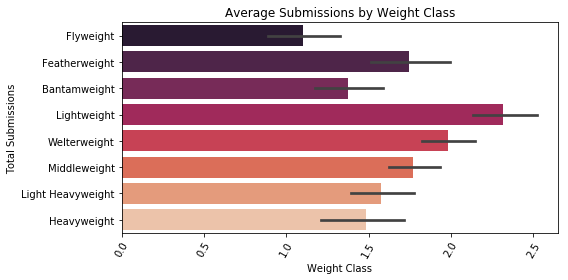

In [14]:
# Concating all Red and Blue Corner's wins by submission
submissionWin_Red_Blue = UFC_df['R_win_by_Submission'] + UFC_df['B_win_by_Submission']

# Ploting
fig, ax = plt.subplots(figsize=(8,4))
submissions = sns.barplot(x=submissionWin_Red_Blue,y="weight_class", data=UFC_df,estimator=mean,order=['Flyweight','Featherweight','Bantamweight','Lightweight','Welterweight','Middleweight','Light Heavyweight','Heavyweight'], palette="rocket")

plt.title('Average Submissions by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Total Submissions')

plt.xticks(rotation=60)
plt.tight_layout()

submissions

### Conclusion: the middle way classes are more likely to win by submission, as they are also attempting more.
> As knockouts are more related to Standing fighting techniques, <br>
We saw that a heavier weight class holds a better chance for knockout.
<br> Submission is more related to 'ground game', where the possibilities for a bar or chock is much higher.
<br> **Here, the two ends of the classes spectrum, the Heaviest and Lightest, has just about the same probability**, as both having hard time to optimize thier own mass in a ground game.


### So Weight Classes are a direvative of the athlete's weight parameter, which is in corellation to other significant factors in combat sports

## Then what other physical key parameters is displayed across Weight Classes?

## Athlete's Height Distribution in UFC

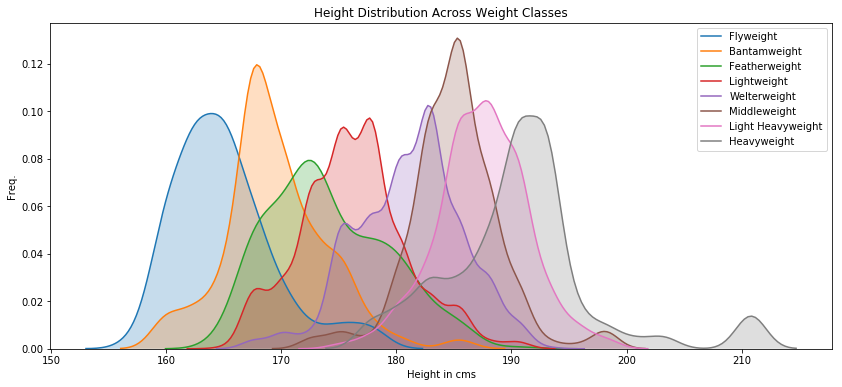

In [15]:
# Listing all athletes by thier class weight
athletesByClasses = []
for i, classWeight in enumerate(classes):
    athletesByClasses.append(UFC_df.loc[UFC_df['weight_class'] == classWeight])

# Listing thier Height
height = []
for i, classWeight in enumerate(athletesByClasses):
    height.append(classWeight.R_Height_cms)

# Defining Graphs size
fig, ax = plt.subplots(figsize=(14, 6))

# Creating a kdeplot for each Class weight
graphs = []
for height, classWeight in zip(height, classes):
    graphs.append(sns.kdeplot(height, shade=True, label=classWeight))


plt.xlabel('Height in cms')
plt.ylabel('Freq.')
plt.title('Height Distribution Across Weight Classes')
plt.show()

### We can definitely observe a linear progression climbing up or down the weight class scale
> Which displays a strong correlation to the weight factor.

## Height leads to the next key parameter: Athelet's Reach
![Reach](https://cdn.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_794/https://fighterculture.com/wp-content/uploads/2020/01/how-to-measure-reach-1.png)

> ' **Reach**, also known as wingspan, is a key measurement in sports like boxing and UFC. This is measured from fingertip to fingertip when your arms are held parallel to the ground. '

> ' **Why reach is important?**
Obviously, the fighter with a longer reach has an advantage. Usually, the fighter with the longer reach will try to keep the distance while the shorter fighter will try to close the distance and land punches from inside. '

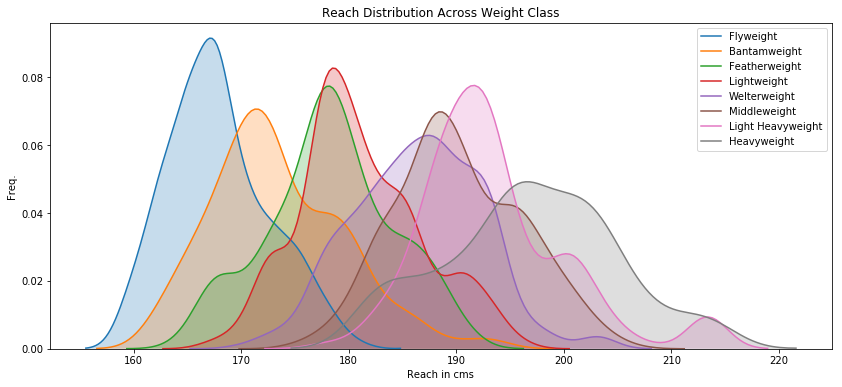

In [16]:
# Listing all athletes by thier class weight
athletesByClasses = []
for i, classWeight in enumerate(classes):
    athletesByClasses.append(UFC_df.loc[UFC_df['weight_class'] == classWeight])

# Listing thier Height
Reach = []
for i, classWeight in enumerate(athletesByClasses):
    Reach.append(classWeight.R_Reach_cms)

# Defining Graphs size
fig, ax = plt.subplots(figsize=(14, 6))

# Creating kde for each Class Weight
graphs = []
for reach, classWeight in zip(Reach, classes):
    graphs.append(sns.kdeplot(reach, shade=True, label=classWeight))

plt.xlabel('Reach in cms')
plt.ylabel('Freq.')
plt.title('Reach Distribution Across Weight Class')
plt.show()

### Here we can also observe that linear fashion scaling up or down but,
> **The overlaping between the classes is bigger** from FeatherWeight to Light HeavyWeight, 
> Which suggest that the correlation of Weight-Reach exsits, but not quite strong as Weight-Height.

## Well the next physical parameter probably has no special correlation to Weight Class,
### But it is an interesting one:
## The Athletes Age Distribution

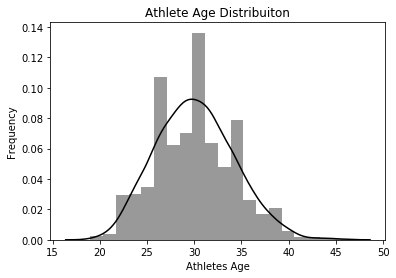

In [17]:
# Creating Age Distribution graph
AgeDis = sns.distplot(UFC_df['R_age'], bins=20, color='black')

plt.title('Athlete Age Distribuiton')
plt.xlabel('Athletes Age')
plt.ylabel('Frequency')

AgeDis

### Age of 30.. I bet it wouldn't be the first guess of many
> And also the fact that there is athletes over 40 is not common in other Sports fields

## Next, Stance
In general there's 3 Stance types:
1. **Orthodox**
2. **Southpaw**
3. **Switch** - when an athletes can use both (1, 2)

> ' In boxing and some other sports, a southpaw stance is where the boxer has their right hand and right foot forward, leading with right jabs, and following with a left cross right hook. It is the normal stance for a left-handed boxer. The corresponding boxing designation for a right-handed boxer is orthodox and is generally a mirror-image of the southpaw stance. In American English, "southpaw" generally refers to a person who is left handed. '

## Let's check how sgnificant the Stance parameter is - 
### Let's find for each stance, how many Contendor and None Contendors it includes:
Let's start with **Orthodox** stance:

> Since it is the same proccess for all stances, i'll write down comments only here at the first

In [18]:
# Creating DF only with relevant columns
cols2Keep = ['R_Stance', 'B_Stance', 'R_fighter', 'B_fighter', 'title_bout']
OrthodoxAthletes = UFC_df[cols2Keep]

# Using loc to target only Orthodox atheltes
OrthodoxAthletes_R = OrthodoxAthletes.loc[OrthodoxAthletes['R_Stance'] == 'Orthodox']

# Deleting Red Corners Data
del OrthodoxAthletes_R['B_Stance']
del OrthodoxAthletes_R['B_fighter']

# Creatring DFs for Contendors and None-Contendors - Red Corner
OrthodoxAthletes_R_None_Con = OrthodoxAthletes_R.loc[OrthodoxAthletes_R['title_bout'] == False]
OrthodoxAthletes_R_Contendors = OrthodoxAthletes_R.loc[OrthodoxAthletes_R['title_bout'] == True]

# numOf_OrthodoxAthletes_R_Contendors = OrthodoxAthletes_R_Contendors['R_fighter'].nunique()
# print('Red Corner - Number of unique Orthodox Contendors athletes:', numOf_OrthodoxAthletes_R_Contendors)

# Using loc to target Blue Corner's Orthodox athletes
OrthodoxAthletes_B = OrthodoxAthletes.loc[OrthodoxAthletes['B_Stance'] == 'Orthodox']

# Deleting Red Corner's Data
del OrthodoxAthletes_B['R_Stance']
del OrthodoxAthletes_B['R_fighter']

# Creatring 2 DFs for Blue Corners Contendors and None-Contendors
OrthodoxAthletes_B_Contendors = OrthodoxAthletes_B.loc[OrthodoxAthletes_B['title_bout'] == True]
OrthodoxAthletes_B_None_Con = OrthodoxAthletes_B.loc[OrthodoxAthletes_B['title_bout'] == False]

# numOf_OrthodoxAthletes_B_Contendors = OrthodoxAthletes_B_Contendors['B_fighter'].nunique()
# print('Blue Corner - Number of unique Orthodox Contendors athletes:', numOf_OrthodoxAthletes_B_Contendors)

# Preparing DFs columns for concat function
newCols = ['Stance', 'Fighter', 'title_bout']
OrthodoxAthletes_R_Contendors.columns = newCols
OrthodoxAthletes_B_Contendors.columns = newCols

# Concat Red and Blue to Contendors DF - Droping nulls, and Duplicates
allOrthodoxAthletes_Contendors = pd.concat([OrthodoxAthletes_R_Contendors, OrthodoxAthletes_B_Contendors]).drop_duplicates(keep='first').reset_index(drop=True).dropna()

# Preparing DFs columns for concat function for All None-Contendors DF
OrthodoxAthletes_R_None_Con.columns = newCols
OrthodoxAthletes_B_None_Con.columns = newCols

# Concating Red and Blue, dropping nulls and Dups
allOrthodoxAthletes_None_Con = pd.concat([OrthodoxAthletes_R_None_Con, OrthodoxAthletes_B_None_Con]).drop_duplicates(keep='first').reset_index(drop=True).dropna()

# Num of unique athletes by name
numOf_allOrthodoxAthletes_Contendors = allOrthodoxAthletes_Contendors['Fighter'].nunique()
numOf_allOrthodoxAthletes_None_Con = allOrthodoxAthletes_None_Con['Fighter'].nunique()

# Creating Stance DF divded to Contendors and None Contendors 
Stance_df = pd.DataFrame(columns = ['Stance','None_Contendors','Contendors'])

# Assiging into list for DF assignment
Orthodox_info = ['Orthodox', numOf_allOrthodoxAthletes_None_Con, numOf_allOrthodoxAthletes_Contendors]

# Assigning the outcome to the Stance DF
Stance_df.loc[len(Stance_df)] = Orthodox_info

Stance_df.head()

,Stance,None_Contendors,Contendors
0,Orthodox,905,114


Now **Southpaw** stance:

In [19]:
#############################################################################################################
## Probably i should have code this with loop, because code repeat itself, same operations as prev code block

cols2Keep = ['R_Stance', 'B_Stance', 'R_fighter', 'B_fighter', 'title_bout']
SouthpawAthletes = UFC_df[cols2Keep]

SouthpawAthletes_R = SouthpawAthletes.loc[SouthpawAthletes['R_Stance'] == 'Southpaw']

del SouthpawAthletes_R['B_Stance']
del SouthpawAthletes_R['B_fighter']

SouthpawAthletes_R_None_Con = SouthpawAthletes_R.loc[SouthpawAthletes_R['title_bout'] == False]
SouthpawAthletes_R_Contendors = SouthpawAthletes_R.loc[SouthpawAthletes_R['title_bout'] == True]

# numOf_SouthpawAthletes_R_Contendors = SouthpawAthletes_R_Contendors['R_fighter'].nunique()
# print('Red Corner - Number of unique Southpaw Contendors athletes:', numOf_SouthpawAthletes_R_Contendors)

SouthpawAthletes_B = SouthpawAthletes.loc[SouthpawAthletes['B_Stance'] == 'Southpaw']

del SouthpawAthletes_B['R_Stance']
del SouthpawAthletes_B['R_fighter']

SouthpawAthletes_B_Contendors = SouthpawAthletes_B.loc[SouthpawAthletes_B['title_bout'] == True]
SouthpawAthletes_B_None_Con = SouthpawAthletes_B.loc[SouthpawAthletes_B['title_bout'] == False]

# numOf_SouthpawAthletes_B_Contendors = SouthpawAthletes_B_Contendors['B_fighter'].nunique()
# print('Blue Corner - Number of unique Southpaw Contendors athletes:', numOf_SouthpawAthletes_B_Contendors)

newCols = ['Stance', 'Fighter', 'title_bout']
SouthpawAthletes_R_Contendors.columns = newCols
SouthpawAthletes_B_Contendors.columns = newCols

allSouthpawAthletes_Contendors = pd.concat([SouthpawAthletes_R_Contendors, SouthpawAthletes_B_Contendors]).drop_duplicates(keep='first').reset_index(drop=True).dropna()

SouthpawAthletes_R_None_Con.columns = newCols
SouthpawAthletes_B_None_Con.columns = newCols

allSouthpawAthletes_None_Con = pd.concat([SouthpawAthletes_R_None_Con, SouthpawAthletes_B_None_Con]).drop_duplicates(keep='first').reset_index(drop=True).dropna()

numOf_allSouthpawAthletes_Contendors = allSouthpawAthletes_Contendors['Fighter'].nunique()
numOf_allSouthpawAthletes_None_Con = allSouthpawAthletes_None_Con['Fighter'].nunique()

Southpaw_info = ['Southpaw', numOf_allSouthpawAthletes_None_Con, numOf_allSouthpawAthletes_Contendors]
Stance_df.loc[len(Stance_df)] = Southpaw_info

Stance_df.head()

,Stance,None_Contendors,Contendors
0,Orthodox,905,114
1,Southpaw,210,33


And **Switch** stance:

In [20]:
# Same operations as prev blocks

cols2Keep = ['R_Stance', 'B_Stance', 'R_fighter', 'B_fighter', 'title_bout']
SwitchAthletes = UFC_df[cols2Keep]

SwitchAthletes_R = SwitchAthletes.loc[SwitchAthletes['R_Stance'] == 'Switch']

del SwitchAthletes_R['B_Stance']
del SwitchAthletes_R['B_fighter']

SwitchAthletes_R_None_Con = SwitchAthletes_R.loc[SwitchAthletes_R['title_bout'] == False]
SwitchAthletes_R_Contendors = SwitchAthletes_R.loc[SwitchAthletes_R['title_bout'] == True]

# numOf_SwitchAthletes_R_Contendors = SwitchAthletes_R_Contendors['R_fighter'].nunique()
# print('Red Corner - Number of unique Switch Contendors athletes:', numOf_SwitchAthletes_R_Contendors)

SwitchAthletes_B = SwitchAthletes.loc[SwitchAthletes['B_Stance'] == 'Switch']

del SwitchAthletes_B['R_Stance']
del SwitchAthletes_B['R_fighter']

SwitchAthletes_B_Contendors = SwitchAthletes_B.loc[SwitchAthletes_B['title_bout'] == True]
SwitchAthletes_B_None_Con = SwitchAthletes_B.loc[SwitchAthletes_B['title_bout'] == False]

# numOf_SwitchAthletes_B_Contendors = SwitchAthletes_B_Contendors['B_fighter'].nunique()
# print('Blue Corner - Number of unique Switch Contendors athletes:', numOf_SwitchAthletes_B_Contendors)

newCols = ['Stance', 'Fighter', 'title_bout']

SwitchAthletes_R_Contendors.columns = newCols
SwitchAthletes_B_Contendors.columns = newCols

allSwitchAthletes_Contendors = pd.concat([SwitchAthletes_R_Contendors, SwitchAthletes_B_Contendors]).drop_duplicates(keep='first').reset_index(drop=True).dropna()

SwitchAthletes_R_None_Con.columns = newCols
SwitchAthletes_B_None_Con.columns = newCols

allSwitchAthletes_None_Con = pd.concat([SwitchAthletes_R_None_Con, SwitchAthletes_B_None_Con]).drop_duplicates(keep='first').reset_index(drop=True).dropna()

numOf_allSwitchAthletes_Contendors = allSwitchAthletes_Contendors['Fighter'].nunique()
numOf_allSwitchAthletes_None_Con = allSwitchAthletes_None_Con['Fighter'].nunique()

Switch_info = ['Switch', numOf_allSwitchAthletes_None_Con, numOf_allSwitchAthletes_Contendors]
Stance_df.loc[len(Stance_df)] = Switch_info

Stance_df.head()

,Stance,None_Contendors,Contendors
0,Orthodox,905,114
1,Southpaw,210,33
2,Switch,45,4


### Now let's combine all the parts so we can visualize

In [21]:
# Creating DF with concat func of all Contendors - Reassuring of dropping dups and nulls
allContendors = pd.concat([allOrthodoxAthletes_Contendors, allSouthpawAthletes_Contendors, allSwitchAthletes_Contendors]).drop_duplicates(keep='first').reset_index(drop=True).dropna()

# Creating DF with concat func of all None Contendors - Reassuring of dropping dups and nulls
allNoneCon = pd.concat([allOrthodoxAthletes_None_Con, allSouthpawAthletes_None_Con, allSwitchAthletes_None_Con]).drop_duplicates(keep='first').reset_index(drop=True).dropna()

# Creating DF with concat func of all Unique Athltes - Reassuring of dropping dups and nulls
allAthletes_NoneDup = pd.concat([allContendors, allNoneCon]).drop_duplicates(keep='first').reset_index(drop=True).dropna()

## Ok so let's see what's the Stance proportional representation in UFC:

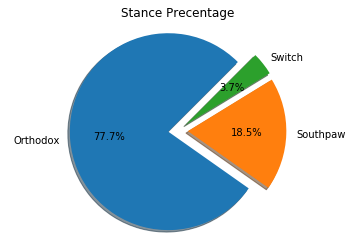

In [22]:
# Creating out of new DF a Pie chart of Stance

# Counting by Stance
stanceCount = allAthletes_NoneDup['Stance'].value_counts()

# Taking out numeric values
shares = stanceCount.values

# Defining shares labels
labels = ['Orthodox', 'Southpaw', 'Switch']

# Shares popout
explode= (0.1,0.1,0.1)

fig, title = plt.subplots()
title.pie(shares, labels=labels, explode=explode, autopct='%1.1f%%',shadow=True, startangle=45)

title.axis('equal')  
plt.title('Stance Precentage')

display(title)

## As Southpaw and Switch athletes are usually left handed
>The graph displays a bigger propotion here at the UFC, **considering the worldwide proportion of Left-Handed, which is estimated to be around the 10%**

## And now let's take a look at the Stance proportion at the Contendors share:

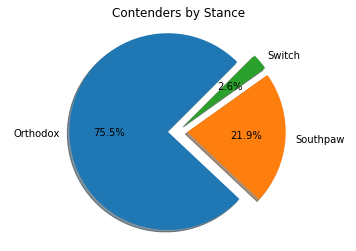

In [23]:
# Same method to create a Pie chart of Contendors by Stance

contendorsCount = allContendors['Stance'].value_counts()
sizes = contendorsCount.values

labels = 'Orthodox', 'Southpaw', 'Switch'

explode = (0.1, 0.1, 0.1) 
fig, title = plt.subplots()

title.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%',shadow=True, startangle=45)
title.axis('equal')  
plt.title('Contenders by Stance')

display(title)

## Suprising or not, the Southpaw share of the Contendors is bigger than their overall proportion in the UFC

> Although not by dramatic numbers, but it is confirming an old predujice which gives the Southpaw somewhat adavantage.<br>
**A suggested reason for this can be the fact that a Orthodox-Orthodox match is more likely,<br>
so an Orthodox-Southpaw could be unusual for the Orthodox athletes, while for the Soutpawers it's prettry usual :)**

## So what's the share of title bouts out of all matchs?

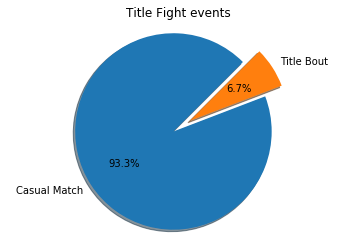

In [24]:
# Same method to create a Pie chart of title bouts share out of all matches

titleBout_Count = UFC_df['title_bout'].value_counts()
sizes = titleBout_Count.values

labels = ['Casual Match' ,'Title Bout']
explode = (0.1, 0.1) 

fig, title = plt.subplots()
title.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=45)
title.axis('equal')  
plt.title('Title Fight events')

display(title)

## Championship: What champion won most title bouts matches?
> The UFC has started with a small set of rules: **No Rules** <br>
That has changed sgnificantly at 30.9.2000, so we'll count since then. <br>
>>BTW, seriously, even hair pulling was allowed, and it did happen 
(Look for Royce Gracie)

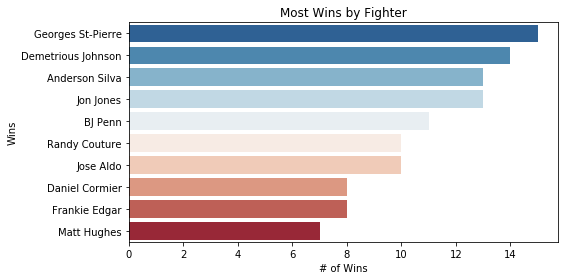

In [25]:
# Using loc to target relevant data from 30/9/2000 - New UFC Rules came in
NewRules = UFC_df.loc[UFC_df['date'] > '2000-09-30']

# Targeting title bouts rows
NewRules_titleBouts = NewRules.loc[NewRules['title_bout'] == True]

# Taking out relevant Athlete's names
athletes = pd.concat([NewRules_titleBouts['R_fighter'], NewRules_titleBouts['B_fighter']], ignore_index=True)

# Counting wins
wins = athletes.value_counts().sort_values(ascending=False).head(10)

# Getting thier names
labels = wins.index

# Defining bars graph
fig, ax = plt.subplots(figsize=(8,4))
mostWins = sns.barplot(x=wins, y=labels, palette="RdBu_r")

plt.title("Most Wins by Fighter")
plt.ylabel("Wins")
plt.xlabel("# of Wins")
plt.tight_layout()

mostWins

### We can see most of recent years  famous champions
Such as **George St-Pierre, Jone Jones, Jose Aldo** and more

# But Let's focus on #3: Anderson Silva

![AndersonSilva](https://images.radio.com/aiu-media/AndersonSilva-d067d44a-434b-469f-baea-649943a8aac3.jpg)

## From Wikipedia:
>" **Anderson da Silva** (Portuguese pronunciation: [ˈɐ̃deʁsõ ˈsiwvɐ]; born April 14, 1975) is a Brazilian-American professional mixed martial artist currently signed with the Ultimate Fighting Championship (UFC). **He is a former UFC Middleweight Champion and holds the record for the longest title reign in UFC history at 2,457 days.**<br>
This started in 2006 and ended in 2013 and included a UFC record 16 consecutive victories in that span. **UFC president Dana White, UFC commentator Joe Rogan, and numerous mixed martial arts (MMA) analysts have named Silva the greatest mixed martial artist of all time.** As of November 18, 2019, he is #15 in the UFC middleweight rankings.[19] "

In [26]:
# Assigning targeted data using loc to new DF dedicated to Silva - From Red Corner Matches
andersonSilva_R = UFC_df.loc[UFC_df['R_fighter'] == 'Anderson Silva']
# Droping all Blue Corners Data - irrelevant and risky
andersonSilva_R = andersonSilva_R.drop(columns = list(andersonSilva_R.filter(regex='B_')))
# Renaming all Red Corners Column names by dropping R_ Prefix - preparation for df concat
andersonSilva_R.columns = [col.replace('R_', '') for col in andersonSilva_R.columns]

# Again, now from Blue Corner Matches
andersonSilva_B = UFC_df.loc[UFC_df['B_fighter'] == 'Anderson Silva']
andersonSilva_B = andersonSilva_B.drop(columns = list(andersonSilva_B.filter(regex='R_')))

# Renaming all Red Corners Column names by dropping B_ Prefix - preparation for df concat
andersonSilva_B.columns = [col.replace('B_', '') for col in andersonSilva_B.columns]

# Concat the two dfs to one so we have all of Silva's data organized
andersonSilva = pd.concat([andersonSilva_R, andersonSilva_B], sort=False)
andersonSilva.head()

,fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,...,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,avg_SUATT,avg_opp_SUATT
1103,Anderson Silva,Yves Lavigne,2017-02-11,"Brooklyn, New York, USA",Red,False,Middleweight,3,5.0,0.0,...,3.0,0.0,16.0,Southpaw,187.96,195.58,185.0,41.0,NaN,NaN
1565,Anderson Silva,Herb Dean,2016-02-27,"London, England, United Kingdom",Blue,False,Middleweight,5,3.0,0.0,...,3.0,0.0,16.0,Southpaw,187.96,195.58,185.0,40.0,NaN,NaN
2068,Anderson Silva,John McCarthy,2015-01-31,"Las Vegas, Nevada, USA",Draw,False,Middleweight,5,2.0,0.0,...,3.0,0.0,16.0,Southpaw,187.96,195.58,185.0,39.0,NaN,NaN
2816,Anderson Silva,Herb Dean,2013-07-06,"Las Vegas, Nevada, USA",Blue,True,Middleweight,5,0.0,16.0,...,3.0,0.0,16.0,Southpaw,187.96,195.58,185.0,38.0,NaN,NaN
3068,Anderson Silva,Marc Goddard,2012-10-13,"Rio de Janeiro, Brazil",Red,False,Light Heavyweight,3,0.0,15.0,...,3.0,0.0,15.0,Southpaw,187.96,195.58,185.0,37.0,NaN,NaN


In [27]:
# Assiging all Silva's attack methods summing of attemptted and landed

total_strikes = andersonSilva['avg_TOTAL_STatt'] + andersonSilva['avg_TOTAL_STlanded']
total_clinch = andersonSilva['avg_CLINCH_att'] + andersonSilva['avg_CLINCH_landed']
total_ground = andersonSilva['avg_GROUND_att'] + andersonSilva['avg_GROUND_landed']
total_td = andersonSilva['avg_TD_att'] + andersonSilva['avg_TD_landed']

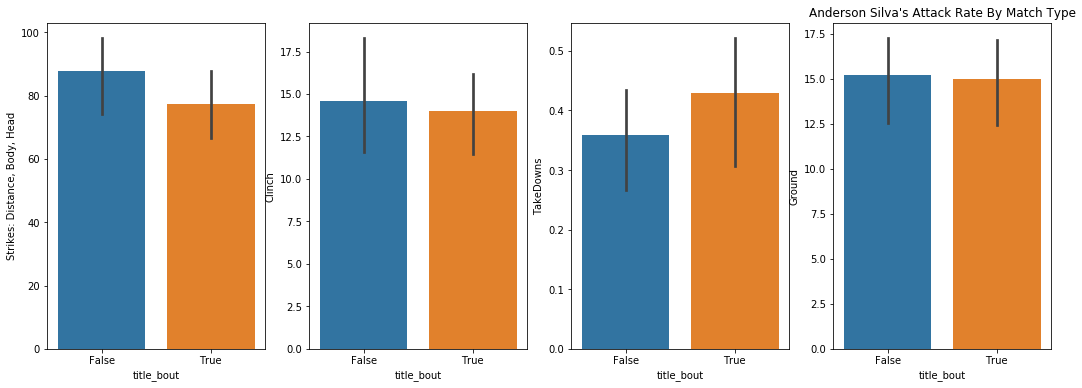

In [28]:
# Creating a 4 bars grid in 1 row
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(18,6))  # create 4 subplots on 1 row

plt.title("Anderson Silva's Attack Rate By Match Type")

# Defining each grpahs labels
ax1.set(ylabel = 'Strikes: Distance, Body, Head')   
ax2.set(ylabel = 'Clinch')   
ax3.set(ylabel = 'TakeDowns')   
ax4.set(ylabel = 'Ground')   

# Plotting
for ax, col in zip((ax1, ax2, ax3, ax4),[total_strikes, total_clinch, total_td, total_ground]):
    sns.barplot(x="title_bout", y=col, data=andersonSilva, ax=ax)

# We can observe here peraphs an unintuitive phenomenon:
## Almost all of Anderson Silva's attack rates at Title Bout matches are lower!
> As mention above in Wikipedia, Silva holds the record for the longest title reign in UFC history at 2,457 days.<br>
In martial arts and UFC included, **the Athlete's mindset during the match is maybe ilusive to measure directly, but surely a key parameter in aim for winning.** <br>
Besides Takedowns and Ground attacks, as a Champion, Silva threw less Shots and got less into Clinch.<br>
Intuitivly it makes no sense to let the offensive 'Off' at Title Bouts. <br>
But peraphs this is exactly what distinct him from other champions, and assiseted him to set the record of Longest Title Reign. <br>
 >> **Takedowns not only has a high point rate (by Judges), but it is an act which will hurt most of the opponentses confidence during the fight.**

# So let's take a look by what win type Silva is more likely to win:
## Again, across Title Bouts

In [29]:
# Creating df \ serieses for Anderson Silva's win types
andersonSilva_wins_byKnockout = andersonSilva['win_by_KO/TKO'] 
andersonSilva_wins_bySubmissions = andersonSilva['win_by_Submission'] 
andersonSilva_wins_judges =  andersonSilva['win_by_Decision_Majority'] + andersonSilva['win_by_Decision_Split'] + andersonSilva['win_by_Decision_Unanimous']

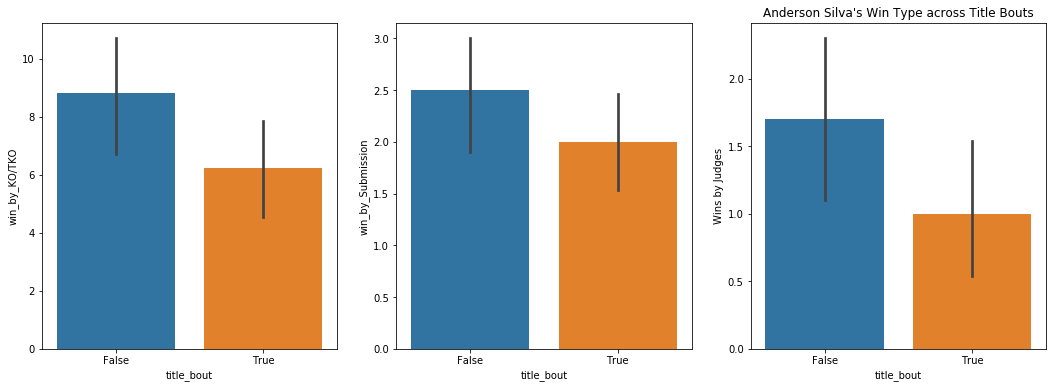

In [30]:
# Creating a 4 bars grid in 1 row
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))  # create 4 subplots on 1 row

plt.title("Anderson Silva's Win Type across Title Bouts")

# Defining each grpahs labels
ax1.set(ylabel = 'Wins by Knockouts')   
ax2.set(ylabel = 'Wins by Submission')
ax3.set(ylabel = 'Wins by Judges') 
   

# Plotting
for ax, col in zip((ax1, ax2, ax3),[andersonSilva_wins_byKnockout, andersonSilva_wins_bySubmissions, andersonSilva_wins_judges]):
    sns.barplot(x="title_bout", y=col, data=andersonSilva, ax=ax)

# Title bout or not, Silva is less likely to win by Judges desicion!
> The graph clearly shows that Anderson Silva's win strategy is not by aggregating judges points.<br>
He simply go for the win by kockout. <br>
**Despite the fact that in average he throws less strike during title bout match, still it is more likely Silva will win by knockout..** impersive.
 

# Section 2: Winner Prediction
# Machine Learning practice using Sklearn to predict the Winner for a UFC match

## First let's take a look at winners by Corner's Color
> I don't think it is officially stated, but it is a known thing that the favourite gets the Red Corner if he didn't ask for the blue

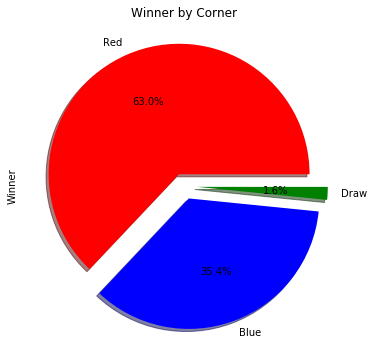

In [31]:
colors = ['red', 'blue', 'green']
plt.figure(figsize=(8,6))
corner = UFC_df['Winner'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',colors=colors,shadow=True)

plt.title('Winner by Corner')

corner

### So the Red-Favourite, Blue-Underdog thing is really reflected in this chart

# Let's predict the Winner - Red or Blue Corner

> This is a basic ML practice, without advanced feature engineering and hyper parameter tunning. <br>
Using Classifiers and Models learned in Machine Learning Course, HiT 2020.

In [32]:
#Reading the UFC Raw Dataset
df = pd.read_csv('./preprocessed_data.csv')

## Exploring the preprocessed Dataset

In [33]:
# DataFrame Details: Num of Rows, Cols and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(134), int64(24), object(1)
memory usage: 4.4+ MB


In [34]:
#Checking the sum of all null values
df.isnull().sum().sort_values(ascending=False)

R_Stance_Switch                 0
R_Stance_Southpaw               0
B_total_time_fought(seconds)    0
B_total_rounds_fought           0
B_avg_opp_TOTAL_STR_landed      0
B_avg_opp_TOTAL_STR_att         0
B_avg_opp_TD_pct                0
B_avg_opp_TD_landed             0
B_avg_opp_TD_att                0
B_avg_opp_SUB_ATT               0
B_avg_opp_SIG_STR_pct           0
B_avg_opp_SIG_STR_landed        0
B_avg_opp_SIG_STR_att           0
B_avg_opp_REV                   0
B_avg_opp_PASS                  0
B_avg_opp_LEG_landed            0
B_avg_opp_LEG_att               0
B_avg_opp_KD                    0
B_avg_opp_HEAD_landed           0
B_total_title_bouts             0
B_win_by_Decision_Majority      0
B_win_by_Decision_Split         0
R_current_win_streak            0
R_avg_DISTANCE_landed           0
R_avg_DISTANCE_att              0
R_avg_CLINCH_landed             0
R_avg_CLINCH_att                0
R_avg_BODY_landed               0
R_avg_BODY_att                  0
R_draw        

In [35]:
#Drop all null values
df.dropna(inplace=True)

#Check for null values again
df.isnull().sum()

Winner                                0
title_bout                            0
no_of_rounds                          0
B_current_lose_streak                 0
B_current_win_streak                  0
B_draw                                0
B_avg_BODY_att                        0
B_avg_BODY_landed                     0
B_avg_CLINCH_att                      0
B_avg_CLINCH_landed                   0
B_avg_DISTANCE_att                    0
B_avg_DISTANCE_landed                 0
B_avg_GROUND_att                      0
B_avg_GROUND_landed                   0
B_avg_HEAD_att                        0
B_avg_HEAD_landed                     0
B_avg_KD                              0
B_avg_LEG_att                         0
B_avg_LEG_landed                      0
B_avg_PASS                            0
B_avg_REV                             0
B_avg_SIG_STR_att                     0
B_avg_SIG_STR_landed                  0
B_avg_SIG_STR_pct                     0
B_avg_SUB_ATT                         0


In [36]:
# Splitting to Features and Categories
y = df['Winner']
X = df.drop(columns = 'Winner')

# Splitting to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [37]:
# Creating Dict to store results of algo types
algos = ['KNN','DesicionTree', 'RandomForest', 'LogisticRegression', 'SupportVectorMachine']
results = dict.fromkeys(algos,0)
results

{'DesicionTree': 0,
 'KNN': 0,
 'LogisticRegression': 0,
 'RandomForest': 0,
 'SupportVectorMachine': 0}

In [38]:
# Creating KNN Classifier - Choosing neighbors hyper param
knn = KNeighborsClassifier(n_neighbors=91)

# Fitting the data
knn.fit(X_train, y_train)

# Predicting
y_pred = knn.predict(X_test)

# Getting Accuracy
KNN_accuracy = accuracy_score(y_test, y_pred)

results['KNN'] = KNN_accuracy
print('Accuracy:', KNN_accuracy * 100.0)

Accuracy: 68.2892906815021


In [39]:
# DesicionTree Classifier - Choosing max depth hyper param
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_pred)

results['DesicionTree'] = DT_accuracy
print('Accuracy:', DT_accuracy * 100.0)

Accuracy: 69.4019471488178


In [40]:
# RandomForest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
RFC_accuracy = accuracy_score(y_test, y_pred)

results['RandomForest'] = RFC_accuracy
print('Accuracy:', RFC_accuracy * 100.0)

Accuracy: 68.56745479833101


In [41]:
# Creating Logistic Regression model, Choosing C and max_iter hyper params
logistic_model = LogisticRegression(C=0.0045, max_iter=200)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

LR_accuracy = accuracy_score(y_test, y_pred)

results['LogisticRegression'] = RFC_accuracy
print('Accuracy:', RFC_accuracy * 100.0)

Accuracy: 68.56745479833101


/home/yair/.local/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
# Support Vector Machine Model - Choosing C hyper param
svc = SVC(C=0.5)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
SVC_accuracy = accuracy_score(y_test, y_pred)

results['SupportVectorMachine'] = SVC_accuracy
print('Accuracy:', SVC_accuracy * 100.0)

Accuracy: 69.4019471488178


In [43]:
bestAlgoResult = max(results.items(), key=lambda x : x[1])

print('Best Result with',bestAlgoResult[0], ':') 
print( bestAlgoResult[1] * 100, '% Accuracy')

Best Result with DesicionTree :
69.4019471488178 % Accuracy


# Section 3 - Summary

## Section 1: 

**A. Dataset validation** - <br>
Overall the dataset didn't require too much preparation besides  dropping null values. <br>
Although the output of the df.info() method seemed right, I casted all the numeric cols to Float again as a double verification.

**B. Data Analysis by Visualiztion** - <br>
> 1. **Weight Classes** - The analysis of the dataset by Weight Class has produced a validation to the logicalness of behind the setup of weight as the foundation of the comptetiveness and fairness of any combat sport. The visualized insights were overall somewhat intuitive and validating the commonsense behind the Weight Class distribution.<br>
2. **Stance types** - A meaningful insight was delivered behind the stance distribution. The Southpaw's share at the Contendors share turned to be bigger than their overall share. This is a quite important insight to take in consideration as an UFC Athlete \ Coach. <br>
It raises the question of how it would be best to address the root cause of this fact - Southpaws are more used to fight None-Southpaw athletes, much more than an Orthodox is used to fight an None-Orthodox, which gives the Southpaw an illusive advantage as displayed. As an Orthodox athlete, ignoring this fact will just pile up to odds of loosing a title bout.
3. **Champions and Title Bouts** - The analysis of Anderson Silva has given a hint to a Champion's mindset, especially when he's the record holder of the longest title reign. Visualizing his average rate of all different attack types at title bouts, has discovered a fact which at first seems as unlogical, as he generates less strikes meaning a lose if the fight will be ruled by the judge's score. But after the plotting Silva's win types across title bouts, it displayed clearly that Silva is not going for a score win - he goes for the hunt, and preferably by Knockout. Done by fashion of high focus and calmness it points out that Silva had a rooted strategy to wear his opponent's confidence by takedowns, and eventually win by Knockout - fits great to how he used to be referred as - The best pound for pound fighter of all times.


# Section 2:
**C. Winner Prediction** - Also here the Dataset did not require much of adjustments, and didn't contain null values or other issues. <br>
Even though the ML practice was quite basic and straight forward, with no feature engineering or hyper parameter advanced tunning, all classifiers and models has reached almost 70% accuracy. <br>
It has left the impression that with advanced implementation, accuracy might be a higher. <br>